## PA3606 UNIT 2: Climate Physics
# Computer Workshop 2: Atmospheric Structure 

## Last time ...
* Origin of the atmosphere & present day composition
* Atmospheric composition units (volume & mass mixing ratios)
* Atmospheric Moisture
* Virtual Temperature
* Simple box models (chemical lifetime, oxidising capacity)
* Atmospheric chemistry (ozone, key issues, uncertainties)

![objectives](img/session_objectives.png)

***
# What is an Atmosphere?
![what is an atmos](img/compres_atm.png)

- An atmosphere is a thin, diffuse fluid that sits above the surface of a planet, held by gravity
- Since an atmosphere’s fluid is a compressible gas rather than a relatively incompressible liquid, it has no clearly defined ‘top’
- The ability of atmosphere gaseous mixture to compress or expand substantially in response to changes in pressure is a driver of dynamical motions
- Like any fluid, the atmosphere flows horizontally under the influence of gravity to maintain a more or less uniform distribution of mass, as measured above any fixed surface


# Atmospheric Regions

![atmos regions](img/atmos_regions.png)

### Definitions
- <span style="color:blue">**Heterosphere**</span>: Dominated by lighter gases with increasing altitude, such as hydrogen and helium (i.e. stratification according to molecular weight)
- <span style="color:blue">**Homosphere**</span>: this part of the atmosphere continually circulates (turbulent mixing), so that the principal atmospheric gases are well-mixed
  

On Earth, for most purposes, we consider the homosphere virtually the entire atmosphere
- <span style="color:blue">**Karman line**</span> can be considered a boundary between Earths atmosphere and outer space
Altitude too thin to support aeronautical flight: a vehicle at this altitude would have to travel faster than orbital velocity to derive sufficient aerodynamic lift
- <span style="color:blue">**Exobase**</span> considered an upper boundary for the Earths atmosphere
Defined as when molecular free path exceeds its scale height. Gases are bound by gravity but where density is too low for them to behave as a gas by colliding with each other
Some thin atmospheres only have an exosphere



# Atmospheric Lapse Rate

![lapse rates](img/lapse_rate_example.png)

The structure of planetary atmospheres are defined by **temperature gradients**, or **atmospheric lapse rates** $\Gamma$:

### $\Gamma = -\frac{dT}{dz} = -\Big(\frac{T_{2}-T_{1}}{z_{2}-z_{1}}\Big)$

- When temperature increases with altitude, the atmosphere is stable 
- When temperature decreases with altitude the atmosphere is less stable


## Exersise 1: Investigating the lapse rate over Lindenberg, Germany
For this first exersise we are going to look at the tropospheric lapse rate between 2008-2016 using radiosonde data collected using weather balloons over Lindenberg in Germany. The dataset we will make use of come from the Global Climate Observing System (GCOS) Reference Upper-Air Network (GRUAN) database (https://www.gruan.org/) which contains measurements from around 30 sites globally. GRUAN empose a set of standard operating proceedures on all sites that wish to qualify as part of the network (probably ~1000 radisonde sites globally). This ensures a calibration consistency across the network, standard characterisation of measuremnts, and production of uncertainities. Therefore, GRUAN observations are considered to be 'climate quality' data.  

![gruan](img/gruan_sites.png)

### Lets begin by reading in some temperature profile data
First we'll load our Python libraries we need:

In [4]:
import netCDF4                  # used for reading in the data
import matplotlib.pyplot as plt # used for plotting the data
import numpy as np              # used for math functions and creating arrays etc
from scipy import stats         # stats module for linear regression

Next we want to read in the radiosonde data from Lindenberg. The steps we follow are:
1. define a variable called ``` filename ``` that tells the computer where to find the data
2. read in the data using the <span style="color:blue">**netCDF4**</span>
3. next we want to take a look at what is inside the file
4. extract the data and close the file

In [16]:
# 1. define filename
filename = "data/gruan_temperature_profiles_lindenberg_2008_to_2016.nc"

# 2. read in the data to memory. We use a unit test approach (good practice) when doing this, the 'try' command
# will first attempt to execute the command witten underneath whichin our case is to read the file into memory,
# if it fails it raises a specific error which tells youthereis an issue with the command
try:
    nc = netCDF4.Dataset(filename)
except IOError:
    raise
# print the global meta data for the file we have just read in
nc

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: Gridded GRUAN tropospheric temperature profiles from Lindenberg
    Conventions: CF-1.5
    Metadata_Conventions: Unidata Dataset Discovery v2.0
    id: 
    product_version: v1.0
    institution: UoL
    creator_url: http://www.le.ac.uk
    creator_email: t.trent@le.ac.uk
    time_coverage_start: 2008-01-01
    time_coverage_stop: 2016-12-31
    geospatial_lat_units: degrees_north
    geospatial_lon_units: degrees_east
    comment: PA3606 Computer Workshop 2
    date_created: 2025-02-16 10:22:19.906320
    dimensions(sizes): time(11233), level(80)
    variables(dimensions): float32 altitude(level), int64 time(time), float32 T(level, time)
    groups: 

from the global meta data we can see that the data inside:
* runs from 2008-2016
* has two dimsions ```dimensions(sizes): time(11233), level(80)```
* has three variables; i) altitude, ii) time, and ii) T

lets look atthe variables in a bit more detail:

In [17]:
# print the variable information to the screen
nc.variables

{'altitude': <class 'netCDF4.Variable'>
 float32 altitude(level)
     long_name: altitude
     standard_name: altitude
     units: m
     coordinate_defines: center
 unlimited dimensions: 
 current shape = (80,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'time': <class 'netCDF4.Variable'>
 int64 time(time)
     long_name: launch time
     standard_name: launch time
     units: seconds since 2008-01-01 00:00:00
     calendar: gregorian
 unlimited dimensions: 
 current shape = (11233,)
 filling on, default _FillValue of -9223372036854775806 used,
 'T': <class 'netCDF4.Variable'>
 float32 T(level, time)
     long_name: temperature
     standard_name: atmospheric temperature
     units: K
     coordinate_defines: center
 unlimited dimensions: 
 current shape = (80, 11233)
 filling on, default _FillValue of 9.969209968386869e+36 used}

from this we can see that the details of each variable are:

| variable | dimensions              | units                             |
|----------|-------------------------|-----------------------------------|
| altitude | level (80)              | m                                 |
| time     | time (11233)            | seconds since 2008-01-01 00:00:00 |
| T        | level x time (80, 11233)| K                                 |

In [18]:
# 4. Extract the data and close the file

# alttiude (m)
alt = nc['altitude'][:] # here we index the variable in the object called nc and select all the data with [:]

# temperature (K)
T = nc['T'][:]

# time - here we extract the time in seconds since 1st Januray 2008. The netCDF4 librayy has a function called 
# num2date method which takes the date and time information held in seconds and converts it into a datetime object.
# We don't use it here, but could if we wanted to have year,month, day, hour, minute ,second information for each sounding.
time = nc['time'][:]

# close the file
nc.close()

##### Next lets make a simple visualisation of the data

Text(0.5, 1.0, 'Gruan Atmospheric Temperature Soundings ($^{\\circ}$C)')

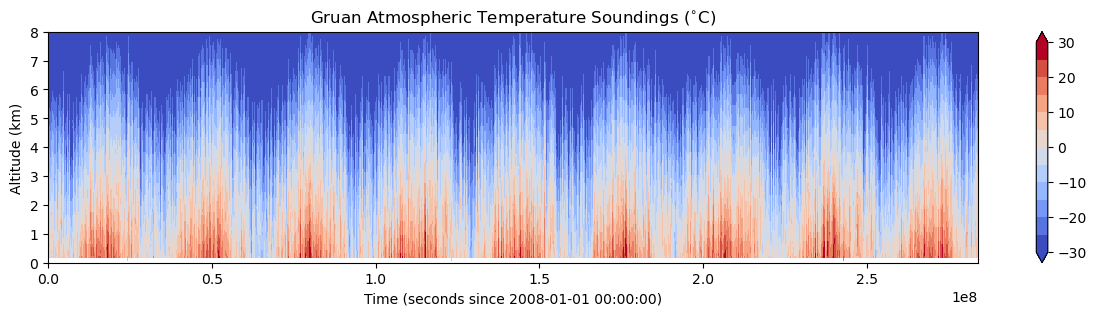

In [41]:
# set the figure size or dimensions
plt.figure(figsize=(15,3))
# plot our 2D temperature data usingthe time and alt arrays to index the different dimensions
# convert altitudes fromm to km (*1e-3) and temperatures from K to degrees C
plt.pcolormesh(time, alt*1e-3, T-273.15,vmin=-30, vmax=30,cmap=plt.get_cmap('coolwarm',12))
# fix the extentof the y axis between 0 and 8 km
plt.ylim(0,8)
# add the label for the y axis
plt.ylabel("Altitude (km)")
# add the label for the x axis
plt.xlabel("Time (seconds since 2008-01-01 00:00:00)")
# add a colour bar and change the end to traiangles to indicatethat the range goes beyond the fixed range (+/- 30)
plt.colorbar(extend='both')
# add a title
plt.title(r"Gruan Atmospheric Temperature Soundings ($^{\circ}$C)") 


Next we want to calculate the environemntal lapse for each of the 11,233 profiles. To do this we write a function into which we can pass the temperatures and altitudes

In [42]:
def calc_lapse_rate(Tprof, zprof):
    """ calculate the environemntal lapse rate for a set of profiles
    inputs Tprof -> atmospheric temperature profiles (K)
           zprof -> altitude profile (km)

    outputs laspe -> environmental lapse rate (K/km)
    """
    # define an array to hold the lapse rates based on the number of profiles in the
    # array Tprof (e.g. dimension 1)
    nprofs = Tprof.shape[1]
    lapse = np.full(nprofs,np.nan)
    # loop over each profile and calculate the environmental lapse rate
    # Note: we are assuming a constant rate between 1 and 8 km
    for tt in range(lapse.size):
        # select the profile and mask any missing values (e.g. NaNs)
        x = np.ma.masked_invalid(Tprof[:,tt])
        # apply the mak to the altitude values
        y = np.ma.masked_array(zprof,mask=x.mask)
        # use the compressed() method to remove all the bad values 
        x, y = x.compressed(), y.compressed()
        # find the points above 1 km in altitude using the where function
        find = np.where(y > 1)
        # filter the profile and altitudes with the indexs from the where statement 
        x, y = x[find], y[find]
        # calculate the lapse rate and store in the correct position in the output array
        lapse[tt] = -1*((x[-1]-x[0])/(y[-1]-y[0]))
    # return the lapse rates
    return lapse

after we calculate the lapse rate what we want to do is look at the spread in the data. To do this we will calculate a Probability Density Function (PDF) using the python function defined below. **Note:** This function assumes our results have a Gaussian distribution.   

In [49]:
def calculate_probDensFunc(yvals, ymin, ymax,nbins=100):
    """ calculate a PDF from the array yvals using scipy.stats norm module
    inputs: yvals -> 1d array of values to be used in PDF calculation
            ymin  -> minimum value for range of yvals PDF is calculated
            ymax  -> maximum value for range of yvals PDF is calculated
            nbins -> number of bins for which PDF is calculated between ymin  and ymax
            
    outputs: xvals -> array of values over which the PDF was calculated (defined by ymin, ymax,nbins)
             PDF   -> array containing PDF values
    """
    # define xvals
    xvals = np.linspace(ymin,ymax,nbins)

    # calculate mean and standard deviation of yvals
    mu = np.mean(yvals)
    std = np.std(yvals)

    # define an empty array to hold PDF values. Here we use the size method to tell the code how many elements 
    # are in this new array and fill each entry with a default value NaN (Not a Number)
    PDF = np.full(xvals.size, np.nan)

    # loop over each value in x and calculate the corresponding PDF value. Because xvals is an array merans in 
    # Python it is iterable (i.e. we can loop over the contents) and by wrapping it in the enumerate function
    # we also get the index of the value (e.g. the firts value in xvals could be -2, therefore x=-2 and ii=0).
    for ii, x in enumerate(xvals):
        PDF[ii] = stats.norm.pdf(x, loc=mu, scale=std)

    # return the results
    return PDF, xvals

we can now perform both calculations using the function we have defined:

In [50]:
lapse_rate = calc_lapse_rate(T, alt*1e-3) # *1e-3 -> m to km  
lapse_pdf,xvals = calculate_probDensFunc(lapse_rate, 4, 9,nbins=100)

Finally, lets plot our results:

Text(0.5, 1.0, 'Enviromental Lapse Rate Calculated over\n Lindenberg (2008-2016)')

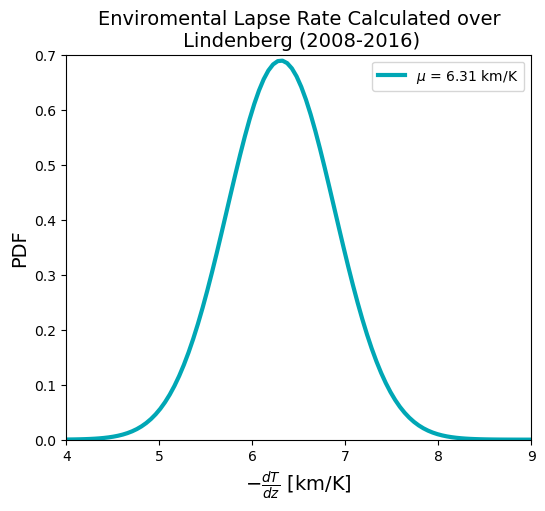

In [61]:
# define the figure size
plt.figure(figsize=(6,5))
# calculate the mean environmental lapse rate 
mu = np.mean(lapse_rate)
# plot the PDF
plt.plot(xvals, lapse_pdf,'-',lw=3,color="#00A7B5",label=r"$\mu$ = "+f"{mu:0.2f} km/K")
# set x and y axis limits
plt.xlim(4,9)
plt.ylim(0,0.7)
# add a legend to display the mean lapse rate value
plt.legend(loc=1,fontsize=10) # loc = location, location 1 = top right
# add labels to both x ans y axes
plt.ylabel("PDF",fontsize=14)
plt.xlabel(r"$-\frac{dT}{dz}$ [km/K]",fontsize=14) # the r before the " allows us to place LaTeX syntax intot he string
# add a title
plt.title("Enviromental Lapse Rate Calculated over\n Lindenberg (2008-2016)",fontsize=14) # the \n put the rest of the string on a new line

### What we can infer from this plot?
***

# Earth’s Temperature Structure
![temp struct](img/temperature_structure.png)

### Troposphere
- Extends to 16 km in the tropics; about 10–12 km elsewhere
- Contains ∼80% of the atmospheric mass; 50% in the lowest 5 km
- Temperature decrease with increasing altitude, owing to cooling from infrared greenhouse gases emissions
- Lapse rate = 6.5 K km$^{−1}$
- Rapid and vigorous circulation

 ### Stratosphere
- Extends to 50 km
- Temperature increases with altitude; stable layer with little vertical air motion
- Temperature increased due to absorption of UV radiation by oxygen/ozone
- Contains ozone layer; maximum around 25 km
- Stratopause = transition region of no temperature change

### Mesosphere
- Extends to about 80–90 km
- Temperature decreases with altitude; extremely thin air loses more energy than it gains
- This is due to decreasing solar heating and increasing cooling by CO2 radiative emissions
- With so few molecules to scatter light, the sky is dark

### Thermosphere
- Above 100 km
- Contains 0.01% of the atmospheric mass; highly diluted gas
- Ionisation of gas atoms causes heating

## What determines atmospheric vertical structure?
![4 factors](img/fourFactorsVertStruct.png)

# Hydrostatic Balance

- Air pressure at any height in the atmosphere is due to the force per unit area exerted by the weight of all of the air lying above that height. Consequently, atmospheric pressure decreases with increasing height above the ground.
- The net upward force acting on a thin horizontal slab of air, due to the decrease in atmospheric pressure with height, is generally very closely in balance with the downward force due to gravitational attraction that acts on the slab.
- If the net upward pressure force on the slab is equal to the downward force of gravity on the slab, the atmosphere is said to be in hydrostatic balance.

![hydrostatic balance image](img/hydrostaticBalance.png)

- For no net acceleration we can equate forces:

### $\rho gdz + p(z+dz)$

- Rearranging and letting the limit $dz \rightarrow 0$

### $\frac{dp}{dz} = -\rho g$

This is the  <span style="color:blue">**hydrostatic equation**</span>, the negative sign ensures that the pressure decreases withincreasing height.


![% of atm frac of pres](img/atm_pres.png)

## Atmospheric Pressure
- The atmosphere is a compressible fluid
- This means the volume of a unit mass depends on the pressure exerted on it
- Or, the density of a gas changes as the pressure on it increases
- Pressure & density decrease exponentially with increasing altitude
- This pressure decrease affects key processes such as:
	1. Atmospheric stability
	2. Distribution of trace gases
	3. Clouds & rainfall
- Standard sea-level pressure (i.e at the surface) is 1013.25 hPa (= 1013.25 mbar)
Note: 1 hPa = 100 Pa = 100 N m−2


***
## Case 1: Constant Density Atmosphere

![example 1;constant dens](img/case_one_const_dens.png)

***
## Case 2: Isothermal Atmosphere ($\Delta T$=0)

![case 2, isothermal](img/case_two_isotherm.png)

## Atmospheric Scale Heights

| Parameter                        | Venus | Earth | Mars | Titan | Jupiter | Saturn | Uranus | Neptune |
|----------------------------------|-------|-------|------|-------|---------|--------|--------|---------|
| Solar constant (W/m$^{2}$)       | 2620  | 1380  | 594  | 15.6  | 50.5    | 14.9   | 3.7    | 1.5     |
| Obliquity (°)                    | 177   | 23.4  | 24.0 | (27)  | 3.1     | 26.7   | 98     | 28.3    |
| Orbital period (years)           | 0.62  | 1     | 1.88 | (29.4)| 11.9    | 29.4   | 84     | 165     |
| Rotation period (hours)          | 5832  | 24    | 24.6 | 383   | 9.9     | 10.7   | 17.2   | 16.1    |
| Planetary albedo $\alpha$              | 0.76  | 0.4   | 0.15 | 0.3   | 0.34    | 0.34   | 0.3    | 0.29    |
| Molecular weight $\mu$ (g/mol) | 43    | 29    | 43   | 29    | 2.2     | 2.1    | 2.6    | 2.6     |
| T$_{\text{surface}}$ or T$_{\text{1bar}}$ (K) | 730   | 288   | 220  | 95    | 165     | 134    | 76     | 72      |
| Surface pressure (bar)           | 92    | 1     | 0.007| 1.47  | n/a     | n/a    | n/a    | n/a     |
| $g$ (m/s$^{2}$)              | 8.9   | 9.8   | 3.7  | 1.35  | 24.2    | 10.0   | 8.8    | 11.1    |
| T$_{\text{eq}}$ (K)          | 229   | 245   | 217  | 83    | 113     | 84     | 60     | 48      |
| Scale height $H$ (km)        | 15    | 8.5   | 12   | 23    | 27      | 60     | 28     | 20      |
| Radius (km)                      | 6052  | 6370  | 3390 | 2575  | 71,500  | 60,300 | 25,000 | 24,800  |
| Mass (10$^{24}$ kg)              | 4.87  | 5.97  | 0.64 | 0.13  | 1900    | 568    | 87     | 102     |


* Isothermal scale height is the distance at which the pressure changes by 1/e
* Oddly, the scale heights of the atmospheres for terrestrial and giant planets are not hugely different in size, even though densities, pressures, temperatures and masses differ by orders of magnitude
* Isothermal height depends on composition as well as gravity


***
## Breakdown of Barometric Law

![barometric breakdown](img/barometricBreakdown.png)

***
![pressure key point](img/pressureKeyPoints.png)

* Isothermal scale height ignores possibility that temperature could vary with z
* To get a better pressure ‘model’ we must consider the thermal structure
### Recall from lecture 4

![contant lapse rate?](img/constLapseRate.png)

The reality is we must consider a piece-wise atmosphere (differences between adjacent layers) in order to have a better model of thermal structure. So what influences thermal structure?
- Solar energy: the top of the atmosphere (TOA) is irradiated by the Sun, whose radiation is absorbed and scattered
- Surface thermal energy: at the bottom of the atmosphere (BOA) from re-radiation of absorbed sunlight (& internal heat sources)
- Changes in chemical structure and composition affect opacity and so thermal structure (e.g., the greenhouse effect), with some chemical reactions are dependent upon pressure as well as temperature
- Composition changed by surface sources and atmospheric chemistry
- Clouds, dust and among also change the opacity and also release energy

Another concept we need to consider is the air parcel. An air parcel is considered an ‘isolated’ air volume which can freely expand or contract but there is no exchange of heat (adiabatic process) and/or molecules with surrounding environment.
- A rising air parcel is surrounded by less dense air, consequently air parcel expands & does work on surroundings (parcel loses energy and therefore it <span style="color:blue">cools</span>)
- A falling air parcel is surrounded by denser air, consequently air parcel contracts & surrounding air does work (parcel gains energy and therefore it <span style="color:red">warms</span>)


![air parcel](img/airParcel.png)

- Convection is the process of vertical heat transfer through vertical mass exchange, driven by buoyancy
- Convection is determined by the vertical movement of fluid parcels
- Buoyancy is governed by the density difference be- tween the parcel and the surrounding environment
- Density differences are governed by temperature of the parcel relative to the surrounding environmental temperature (since atmospheric pressure is roughly the same horizontally and density varies inversely with temperature)
- If a parcel is <span style="color:red">warmer</span> than its surroundings it will rise
- If a parcel is <span style="color:blue">cooler</span> than its surroundings it will sink
- Convection is complicated owing air’s compressibility & variations pressure, density, and temperature
- To understand convection we need to consider the ideal gas equation, hydrostatic balance & the first law of thermodynamics


## The Dry Adiabatic Lapse Rate

![dry lapse rate](img/dryAdiabaticLapseRate.png)

- Real lapse rate is smaller than $\Gamma_{dry}$
- This mainly is because moisture is present in the atmosphere, as moisture condenses latent heat (lecture 4) is released
![latent heat stability](img/latentHeatStability.png)

***
## Pseudo-Adiabatic (or Moist) Lapse Rate

![moist lapse rate](img/moistLapseRate.png)

***
![conditional stability](img/condStability.png)

***
![deep convection](img/deepConvection.png)

## Exersise 2: Example Adiabats

![radisonde launch](img/balloonLaunchNottingham.png)

In this exersise we are going to look at three example profiles from radiosonde measurments made at the Met Office observation site at Nottingham Watnall (WMO id 03354). The station is located 117m above mean sea level in Nottinghamshire, east UK (https://www.youtube.com/watch?v=Su8Bhp3XEY4). The details for each launch are stored in the following files:

In [78]:
# define full paths to radiosnde soundings over Nottingham Watnall site
file1 = "data/Nottingham2020.txt"
file2 = "data/Nottingham2022.txt"
file3 = "data/Nottingham2024.txt"

you will notice the foramt for these files is ```.txt``` which means they are human readable. If ou double click on one of the files you can see it will open in a neighbouring tab:
![txt file contents example](img/file_contents_example.png)

from the file header we can see these files contain the following information:

| Variable | Long Name                          | Units       |
|----------|-----------------------------------|------------|
| PRES     | Pressure                          | hPa        |
| HGHT     | Height                            | m          |
| TEMP     | Temperature                       | °C         |
| DWPT     | Dew Point Temperature             | °C         |
| RELH     | Relative Humidity                 | %          |
| MIXR     | Mixing Ratio                      | g/kg       |
| DRCT     | Wind Direction                    | degrees    |
| SKNT     | Wind Speed                        | knots      |
| THTA     | Potential Temperature             | K          |
| THTE     | Equivalent Potential Temperature  | K          |
| THTV     | Virtual Potential Temperature     | K          |

lets create a function to read in the file and extract the height and temperature profile information. For this function we will make use of the <span style="color:blue">np.loadtxt</span> method. If we want to know more about a method from a library in Python we can use the ```help``` command

In [79]:
help(np.loadtxt)

Help on function loadtxt in module numpy:

loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding=None, max_rows=None, *, quotechar=None, like=None)
    Load data from a text file.
    
    Parameters
    ----------
    fname : file, str, pathlib.Path, list of str, generator
        File, filename, list, or generator to read.  If the filename
        extension is ``.gz`` or ``.bz2``, the file is first decompressed. Note
        that generators must return bytes or strings. The strings
        in a list or produced by a generator are treated as lines.
    dtype : data-type, optional
        Data-type of the resulting array; default: float.  If this is a
        structured data-type, the resulting array will be 1-dimensional, and
        each row will be interpreted as an element of the array.  In this
        case, the number of columns used must match the number of fields in
        the data-type.
 

lets write our function ...

In [80]:
def read_in_radiosonde_profile(filename):
    """ read in radiosonde text files from University of Wyoming archive.
    inputs: filename -> full path to file

    outputs: hght    -> radiosonde altitude profile (km)
             temp    -> radisonde temperature profile (K)
    """
    # read in data skipping the first 4 rows as this contains the header information 
    data = np.loadtxt(filename,skiprows=4)

    # extract altitude information and convert units
    HGHT = data[:,1]*1e-3 # m to km
    # extract the temperature profile information
    TEMP = data[:,2]
    # create a mask for any bad/missing data points
    bad = (HGHT == -999)|(TEMP == -999)
    # mask and remove bad data points using .compressed()
    hght = np.ma.masked_array(HGHT,mask=bad).compressed()
    temp = np.ma.masked_array(TEMP,mask=bad).compressed()

    return hght, temp

Now we have the method to read in the data let read in all three profiles and store them as variables

In [81]:
# read in filename 1 (2020)
alts1, tmp1 = read_in_radiosonde_profile(file1)
# read in filename 2 (2022)
alts2, tmp2 = read_in_radiosonde_profile(file2)
# read in filename 3 (2024)
alts3, tmp3 = read_in_radiosonde_profile(file3)

We want to plot these results using a multipanel plot so we can compre them side-by-side. Therefore, we need to create a generic plotting finction which we can reuse for each profile

In [85]:
def plot_temp_profile(alts, tmp):
    """ generic profile plotting code
    inputs: alts -> altitude profile (km)
            tmp  -> temperature profile (K)

    outputs: plot including moist and dry lapse rate adiabats
    """
    # first calculate the moist and dry lapse rate profiles
    T0 = tmp[0] # take the near-surface air temperature value
    # calculate the upper temperature value based on a constant moist lapse rate
    T1 = T0 -((alts[-1]-alts[0])*6.5)
    # calculate the upper temperature value based on a constant dry adiabatic lapse rate
    T2 = T0 -((alts[-1]-alts[0])*9.8)
    # plot lapse rate lines
    plt.plot([T0, T1], [0,alts[-1]],'--',color='k',label='Moist Lapse Rate')
    plt.plot([T0, T2], [0,alts[-1]],':', color='k',label='Dry Adiabatic Lapse Rate')
    # plot temperature profile
    plt.plot(tmp,alts,color='r', label='Atmospheric Temperature')
    # set limits for x and y axes
    plt.ylim(0,15)
    plt.xlim(-75,50)
    # add labels for x and y axes
    plt.ylabel("Altitude (km)")
    plt.xlabel(r"Temperature ($^{\circ}$C)")
    # add major grid lines
    plt.grid(True)
    # add a legend
    plt.legend(loc='best',fontsize=10)

now we make our multipanel plot using ```plt.subplot()```, where the numbers in the parentheses represent the (number of rows, number of columns, plot number). We plot each profile using the <span style="color:blue">plot_temp_profile()</span> function above, adding a title as we go to distinquish between the different profiles

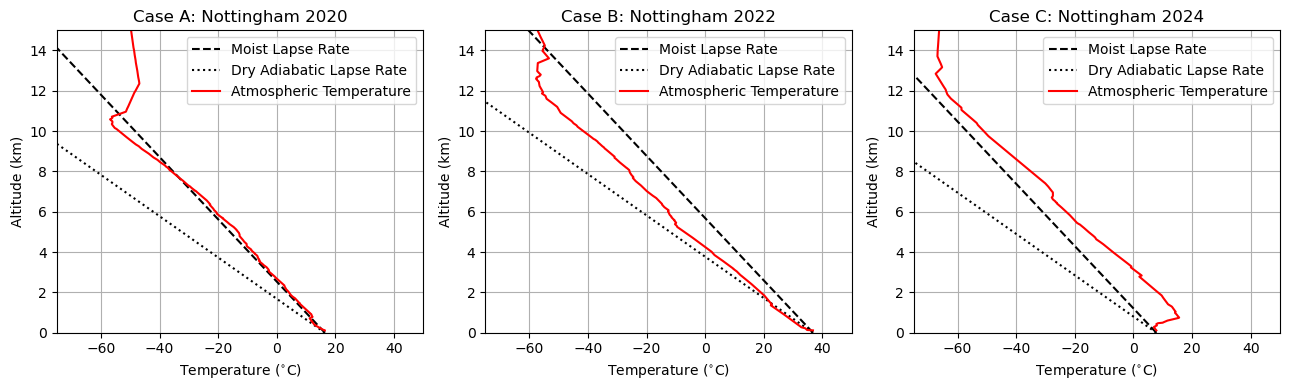

In [86]:
# set the plot size
plt.figure(figsize=(13,4))

# first plot, filename 1 (2020)
plt.subplot(131)
plot_temp_profile(alts1, tmp1)
plt.title("Case A: Nottingham 2020")

# second plot, filename 2 (2022)
plt.subplot(132)
plot_temp_profile(alts2, tmp2)
plt.title("Case B: Nottingham 2022")

# third plot, filename 3 (2024)
plt.subplot(133)
plot_temp_profile(alts3, tmp3)
plt.title("Case C: Nottingham 2024")

# optimise white space around plots
plt.tight_layout()

### what can we infer from these plots?

| Case | Absolutely Unstable | Conditionally Unstable | Stable | Absolutely Stable |
|------|---------------------|----------------------|----------|-------------------|
| A    |                     |                      | &#9989;  |                   |
| B    |                     |          &#9989;     |          |                   |
| C    |                     |                      |          | &#9989;           |
 


***
# **How is this information used by meterologists?**

***
![atmos stability tephigram](img/tephigram_1.png)

***
![atmos stability tephigram](img/tephigram_2.png)

***
![atmos stability tephigram](img/tephigram_3.png)

***
![atmos stability tephigram](img/tephigram_4.png)

***
![atmos stability tephigram](img/tephigram_5.png)

***
![](img/radConvModels.png)

***
![](img/radConvEqual.png)

***
![](img/radConvAbsorb.png)

***
![](img/atmosHeatRates.png)

***
![](img/radHeatRates.png)

***
![](img/lect4_netRadFluxDiv.png)

***
# Basic Temperature profile – key factors

![](img/tempProfKeyPoints.png)

Temperature structure is not homogenous throughout atmosphere owing to different heat energy transport mechanisms & different radiative processes at different altitudes

**In the troposphere**
- Temperature is determined by a combination of radiative and convective (the vertical transfer of heat through fluid motion or turbulence) processes
- Ground warms due to incoming solar radiation and by longwave (IR) radiation emitted by atmospheric absorbers
- Ground cools through radiation emissions, latent heat (evaporation), and sensible heat fluxes; latter are both linked with turbulence/convection
- The atmosphere above the ground warms by absorbing terrestrial longwave radiation & partly by absorption of solar radiation
- However, the resulting vertical (radiative equilibrium) temperature profile is convectively unstable, setting up **vertical mixing that modifies it to its final shape.**

**In the stratosphere**
- Atmospheric heating due to ozone absorption of solar UV radiation (this prevents stratospheric isothermal layer)
- Radiative emissions dominant heat transport mode; ~**region is convectively stable**


***
![](img/summary.png)
***

![](img/nobel_prize.png)